In [66]:
import pandas as pd
from pybedtools import BedTool
import numpy as np
from plot_params import *

In [95]:
def test_enrichment_of_functionl(fname, ax = None):
    variants = pd.read_csv(fname)
    variants['likely_functional']=((variants['MAF_bin']=='singleton')|
                               (variants['MAF_bin']=='(0.0, 0.0001]')
                              )&(variants['delta_score']<-0.5)
    functional_bs = variants.groupby(by = 'name')['likely_functional'].any().to_frame()
    functional_bs = functional_bs.merge(variants[['CHROM',
       'name', 'feature_type_top', 'feature_types', 'gene_name',
       'transcript_types', 'transcript_type_top']].drop_duplicates(),
                    left_index = True, right_on = 'name')
    fcount = functional_bs.groupby(by = 'likely_functional')['feature_type_top'].value_counts().unstack().fillna(0)
    if ax:
        fcount.T.plot.bar(stacked = True, ax = ax)
        ax.set_ylabel('# windows')
    else:
        fcount.T.plot.bar(stacked = True)
    
        
    
    return variants, fcount

In [64]:
np.exp(0.5)

1.6487212707001282

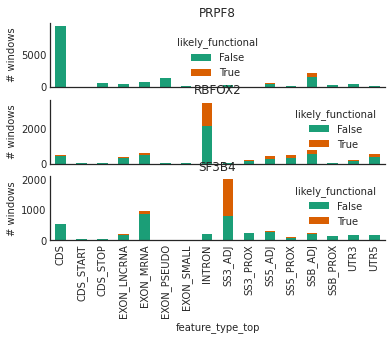

In [96]:
f, ax = plt.subplots(3,1, sharex = True)
prpf_df, prpf_count = test_enrichment_of_functionl('PRPF8.variant_score.csv', ax=ax[0])
ax[0].set_title('PRPF8')
rbfox_df, rbfox_count=test_enrichment_of_functionl('RBFOX2.variant_score.csv', ax = ax[1])
ax[1].set_title('RBFOX2')
sf3b_df, sf3b_count = test_enrichment_of_functionl('SF3B4.variant_score.csv', ax = ax[2])
ax[2].set_title('SF3B4')

sns.despine()
plt.savefig(figdir/ 'fraction_functional_variants.pdf')

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
from plot_params import *
from scipy.stats import fisher_exact, chisquare
from pathlib import Path

In [101]:
def test_for_significance(functional_bs, fcount, to_group = 'feature_type_top'):
    rate = functional_bs['likely_functional'].mean()
    rate_vec = pd.Series([rate, 1-rate], index = [True, False])
    rate_vec.name = 'null'
    test_stat = []
    for index, row in pd.pivot_table(functional_bs, index = to_group, columns = 'likely_functional', aggfunc = 'size'
                                    ).fillna(0).iterrows():
        cnt = row.sum()
        cont = pd.concat([row, cnt*rate_vec], axis = 1)
        if row.le(5).any().any():


            _,p = fisher_exact(cont)
        else:
            _,p = chisquare(cont[index], cont['null'])
        test_stat.append([index, p])
    test_stat = pd.DataFrame(test_stat, columns = ['feature_type_top', 'pvalue']).set_index('feature_type_top')
    test_stat['odds_ratio']=((fcount.loc[True]/fcount.loc[False])/rate)
    return test_stat

<AxesSubplot: xlabel='feature_type_top'>

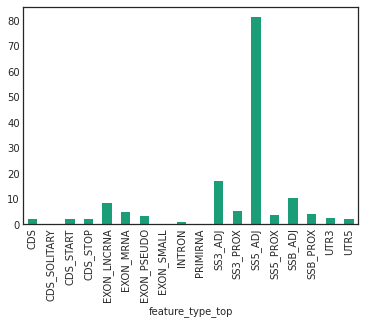

In [98]:
test_for_significance(prpf_df, prpf_count)['odds_ratio'].plot.bar()

<AxesSubplot: xlabel='feature_type_top'>

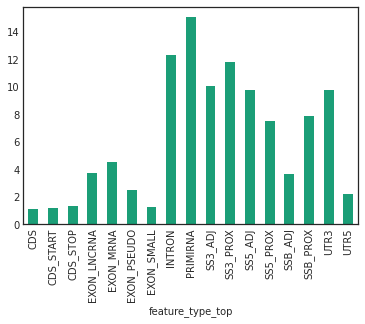

In [99]:
test_for_significance(rbfox_df, rbfox_count)['odds_ratio'].plot.bar()

<AxesSubplot: xlabel='feature_type_top'>

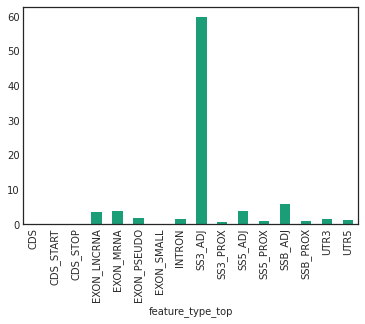

In [100]:
test_for_significance(sf3b_df, sf3b_count)['odds_ratio'].plot.bar()

In [3]:
import pandas as pd
rbfox2_kd = pd.read_csv('ENCFF630MXC.tsv', sep = '\t')

In [6]:
rbfox2_kd['gene_id'] = list(pd.Series(rbfox2_kd.index).apply(lambda s: s.split('.')[0]))

In [7]:
rbfox2_kd['gene_id']

ENSG00000000003.10    ENSG00000000003
ENSG00000000419.8     ENSG00000000419
ENSG00000000457.9     ENSG00000000457
ENSG00000000460.12    ENSG00000000460
ENSG00000000971.11    ENSG00000000971
                           ...       
ENSG00000273155.1     ENSG00000273155
ENSG00000273173.1     ENSG00000273173
ENSG00000273217.1     ENSG00000273217
ENSG00000273274.1     ENSG00000273274
ENSG00000273439.1     ENSG00000273439
Name: gene_id, Length: 14942, dtype: object

In [10]:
from pybedtools import BedTool
gencode_coords = BedTool('/home/hsher/gencode_coords/gencode.v33.annotation.gff3')
id2gene = {}
for r in gencode_coords:
    if r[2]=='gene':
        id2gene[r.attrs['gene_id'].split('.')[0]]=r.attrs['gene_name']

In [12]:
rbfox2_kd['gene_name']=rbfox2_kd['gene_id'].map(id2gene)

In [20]:
rbfox2_kd.loc[rbfox2_kd['gene_name']=='PRKDC']

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,gene_id,gene_name
ENSG00000253729.3,5017.662405,-0.225294,0.255527,-0.881681,0.377949,0.99999,ENSG00000253729,PRKDC


In [22]:
import numpy as np
np.exp(-2.19785)

0.11104164143024527